### Lista de exercícios - exercício 9

**Aluno:** André F. Oliveira

/home/andre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log10
/home/andre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in log10
/home/andre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in log10


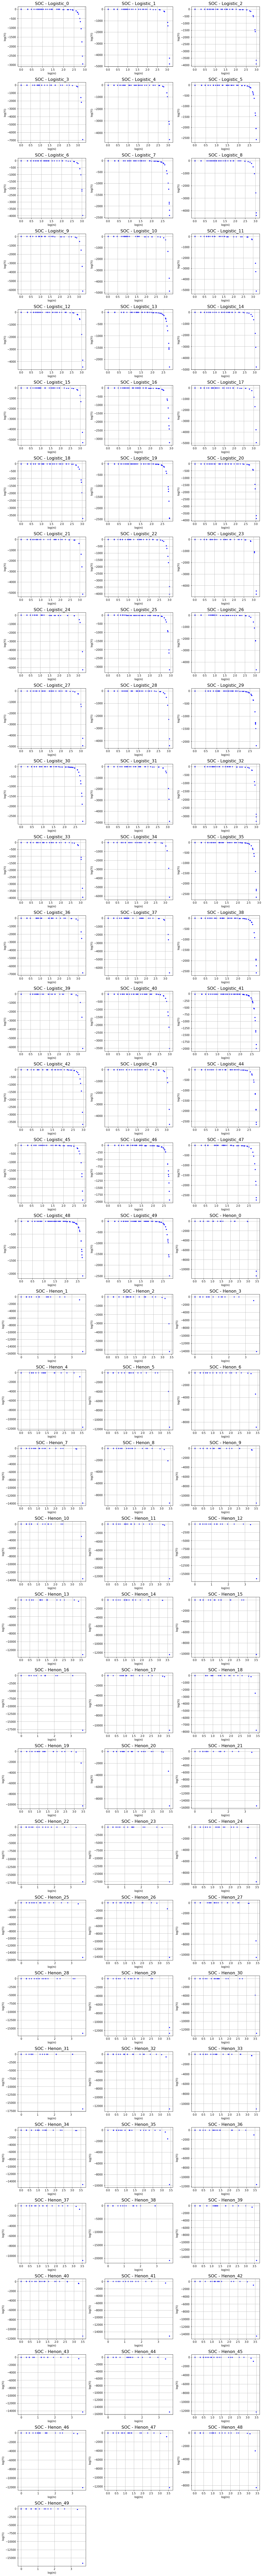

In [21]:
import numpy as np
import pandas as pd
from p_model import pmodel
import matplotlib.pyplot as plt


def colname(n,name):
    """
    Retorna uma lista com as strings dos valores de N e sinal atuais
    """

    col = []
    for i in range(n):
        col.append(name+'_'+str(i))
        
    return col  


def SOC(data, n_bins=100): 
    n = len(data)
    mean = np.mean(data)
    var = np.var(data)
    std = np.std(data)
   # print("mean: ", mean, " var: ", var, "std: ", std)
    """ Computa a Taxa Local de Flutuação para cada valor da ST """ 
    Gamma = []
    
    for i in range(0,n): #Gamma.append((data[i] - mean)/var) 
        Gamma.append((data[i] - mean)/std)
    
        """ Computa P[Psi_i] """
        # Retorna o número de elementos em cada bin, bem como os delimitare
    counts, bins = np.histogram(Gamma, n_bins)

    Prob_Gamma = []
    for i in range(0, n_bins):
        Prob_Gamma.append(counts[i]/n) #plt.plot(Gamma)
    
    return Prob_Gamma, counts



##################Modulo 2############################
S1 = []
S2 = []
n_sinais = 2**13
n_iter = 50

for i in range(n_iter):
    #sinal endógeno
    p_endo = np.random.uniform(0.32,0.42)
    x, y = pmodel(n_sinais,p_endo,-0.4)
    S1.append(x-1)

    #sinal exógeno
    p_exo = np.random.uniform(0.18,0.28)
    x, y = pmodel(n_sinais,p_exo,-0.7)
    S2.append(x-1)
    
tmp1 = pd.DataFrame(np.transpose(S1),columns=colname(n_iter,'Logistic'))
tmp2 = pd.DataFrame(np.transpose(S2),columns=colname(n_iter,'Henon'))
df = pd.concat([tmp1,tmp2], join='inner', axis=1)

plt.figure(figsize=(14,200))
plot_counter = 1
for col in df.columns:
    plt.subplot(int(np.ceil(len(df.columns)/2)),3,plot_counter)
    data = df[col].values

    Prob_Gamma, counts = SOC(data)

    x = np.linspace(1, len(counts), len(counts))

    log_Prob = np.log10(Prob_Gamma)
    log_counts = np.log10(counts)

    p = np.array(Prob_Gamma)
    p = p[np.nonzero(p)]
    c = counts[np.nonzero(counts)] 
    log_p = np.log10(p)
    log_c = np.log10(c)

    a = (log_p[np.argmax(c)] - log_p[np.argmin(c)]) / (np.max(c) - np.min(c))
    b = log_Prob[0]
    y = b * np.power(10, (a*counts))

    """ Plotagem """
    plt.scatter(np.log10(counts), y, marker=".", color="blue")

    plt.title('SOC - '+col, fontsize = 16) 
    plt.xlabel('log(ni)') 
    plt.ylabel('log(Yi)')
    plt.grid()
    
    plot_counter = plot_counter + 1
    
plt.tight_layout()
plt.show()